<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></span><ul class="toc-item"><li><span><a href="#Attribute-Information" data-toc-modified-id="Attribute-Information-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Attribute Information</a></span></li></ul></li><li><span><a href="#Import-Necessary-Libraries" data-toc-modified-id="Import-Necessary-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Necessary Libraries</a></span></li><li><span><a href="#Importing-the-Dataset" data-toc-modified-id="Importing-the-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing the Dataset</a></span><ul class="toc-item"><li><span><a href="#Load-the-dataset-of-SMS-messages" data-toc-modified-id="Load-the-dataset-of-SMS-messages-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load the dataset of SMS messages</a></span></li><li><span><a href="#Print-useful-information-about-the-dataset" data-toc-modified-id="Print-useful-information-about-the-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Print useful information about the dataset</a></span></li></ul></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Determine-the-count-of-each-class" data-toc-modified-id="Determine-the-count-of-each-class-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Determine the count of each class</a></span></li><li><span><a href="#Word-Cloud" data-toc-modified-id="Word-Cloud-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Word Cloud</a></span></li></ul></li><li><span><a href="#Data-Cleaning-and-Preprocessing" data-toc-modified-id="Data-Cleaning-and-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Cleaning and Preprocessing</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Building</a></span></li></ul></div>

# Problem Statement

**Can we use NLP to classify SMS as spam or not?**

# Data Source

Now that we have ensured that our libraries are installed correctly, let's load the data set as a Pandas DataFrame. Furthermore, let's extract some useful information such as the column information and class distributions. 

The data set we will be using comes from the UCI Machine Learning Repository.  It contains over 5000 SMS labeled messages that have been collected for mobile phone spam research. 


https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

## Attribute Information

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:

ham What you doing?how are you? <br>
ham Ok lar... Joking wif u oni... <br>
ham dun say so early hor... U c already then say... <br>
ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H* <br>
ham Siva is in hostel aha:-. <br>
ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was  wif n he finally guessed darren lor. <br>
spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop <br>
spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B <br>
spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU <br>

Note: The messages are not chronologically sorted.

# Import Necessary Libraries

To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library.  This will also improve the reproducibility of the project.

In [1]:
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

print('Python: {}'.format(sys.version))
print('NLTK: {}'.format(nltk.__version__))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))

Python: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
NLTK: 3.5
Scikit-learn: 0.23.2
Pandas: 1.1.4
Numpy: 1.18.5


# Importing the Dataset

## Load the dataset of SMS messages

In [2]:
df = pd.read_table('SMSSPamCollection', sep='\t',header=None, encoding='utf-8',names=['label','message'])

## Print useful information about the dataset

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Exploratory Analysis

## Determine the count of each class

In [4]:
classes = df['label']
print(classes.value_counts())

ham     4825
spam     747
Name: label, dtype: int64


## Word Cloud

Word clouds are a useful way to visualize text data because they make understanding word frequencies easier. Words that appear more frequently within the email text appear larger in the cloud. Word Clouds make it easy to identify “key words.”

In [5]:
import wordcloud as wc
import matplotlib.pyplot as plt

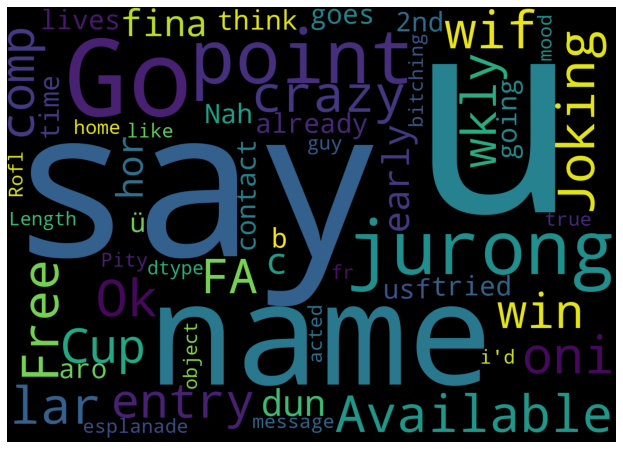

In [6]:
wordcloud = wc.WordCloud(width = 1400, height = 1000, background_color = 'black', stopwords=stopwords.words('english'), 
                                max_words = 1000, min_font_size = 20).generate(str(df['message']))
#plot the word cloud
fig = plt.figure(figsize = (12,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Cleaning and Preprocessing

Preprocessing the data is an essential step in natural language process. In the following cells, we will use Regular Expression to preprocess the messages and also convert our class labels to binary values using the LabelEncoder from sklearn, replace email addresses, URLs, phone numbers, and other symbols by using regular expressions, remove stop words, and extract word stems.  

In [7]:
stemmer = PorterStemmer()
corpus=[]

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [stemmer.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [9]:
# Creating the TFIDF Model 
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X = tf.fit_transform(corpus).toarray()

In [10]:
# convert class labels to binary values, 0 = ham and 1 = spam
y = pd.get_dummies(df['label'])

In [11]:
#since we want only one column to classify, we remove the ham column
y = y.iloc[:,1].values

# Feature Engineering

Feature engineering is the process of using domain knowledge of the data to create features for machine learning algorithms. In this project, the words in each text message will be our features.  For this purpose, it will be necessary to tokenize each word.  We will use the 1500 most common words as features.

In [12]:
from nltk.tokenize import word_tokenize

# create bag-of-words
all_words = []

for message in corpus:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [13]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 6312
Most common words: [('u', 1228), ('call', 695), ('go', 462), ('get', 458), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 305), ('ok', 293), ('day', 293), ('free', 288), ('know', 275), ('love', 266), ('like', 261), ('time', 254)]


In [14]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [15]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(corpus[0])
for key, value in features.items():
    if value == True:
        print(key)

go
jurong
point
crazi
avail
bugi
n
great
world
la
e
buffet
cine
got
amor
wat


# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model Building

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 0.9130044843049328
Decision Tree Accuracy: 0.9721973094170404
Random Forest Accuracy: 0.9802690582959641
Logistic Regression Accuracy: 0.9632286995515695
SGD Classifier Accuracy: 0.9829596412556054
Naive Bayes Accuracy: 0.9695067264573991
SVM Linear Accuracy: 0.9838565022421525


Since, the SVM Linear Model gives the best accuracy; we will use this model.

In [19]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9838565022421525
[[954   1]
 [ 17 143]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.99      0.89      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115

